<div style="border-radius: 20px; border: 2px solid #33cc99; padding: 25px; background-color: #1a1a2e; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3);">
    <h1 style="color: #00e6b8; text-shadow: 3px 3px 6px rgba(0, 0, 0, 0.6); font-weight: bold; margin-bottom: 15px; font-size: 34px;">Unlocking the Comprehensive Exploration of Predictive Insights for Used Cars 📊🔍 </h1>
</div>

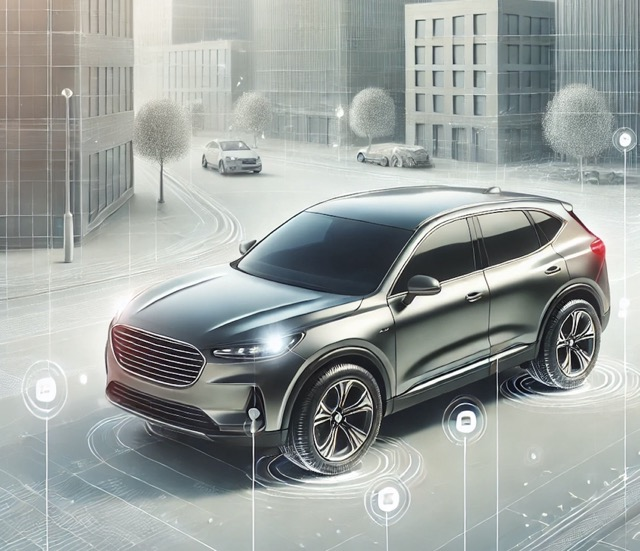

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from matplotlib.gridspec import GridSpec
from IPython.display import display, HTML
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")

## 2. Reading the Data & Preliminary Analysis

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv', index_col ="id")
test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv', index_col="id")
sample = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv', index_col="id")

In [3]:
train.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
test.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
id,,,,,,,,,,,
188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [5]:
train.duplicated().sum()

0

In [6]:
test.duplicated().sum()

0

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.7+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125690 entries, 188533 to 314222
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         125690 non-null  object
 1   model         125690 non-null  object
 2   model_year    125690 non-null  int64 
 3   milage        125690 non-null  int64 
 4   fuel_type     122307 non-null  object
 5   engine        125690 non-null  object
 6   transmission  125690 non-null  object
 7   ext_col       125690 non-null  object
 8   int_col       125690 non-null  object
 9   accident      124058 non-null  object
 10  clean_title   111451 non-null  object
dtypes: int64(2), object(9)
memory usage: 11.5+ MB


In [9]:
train.describe(include="number")

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


In [10]:
train.describe(include="O")

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
count,188533,188533,183450,188533,188533,188533,188533,186081,167114
unique,57,1897,7,1117,52,319,156,2,1
top,Ford,F-150 XLT,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
freq,23088,2945,165940,3462,49904,48658,107674,144514,167114


In [11]:
def missing_info(data):
  na_cols = [col for col in data.columns if data[col].isna().any()]
  na_counts = [data[col].isna().sum() for col in na_cols]
  na_pct = [(data[col].isna().mean() * 100) for col in na_cols]

  return (
      pd
      .DataFrame(data={
          "variable": na_cols,
          "count": na_counts,
          "percentage": na_pct
      })
      .sort_values(by="count", ascending=False)
      .set_index("variable")
  )

In [12]:
missing_info(train)

,count,percentage
variable,,
clean_title,21419,11.360876
fuel_type,5083,2.696080
accident,2452,1.300568


In [13]:
missing_info(test)

,count,percentage
variable,,
clean_title,14239,11.328666
fuel_type,3383,2.691543
accident,1632,1.298433


* The train dataset contains 188533 rows and 11 features
* The test dataset contains 125690 rows and 11 features
* We have ensured that there are no duplicate values in both the training set and test set
* There are missing values in the following columns of the train and test datasets: `clean_title`, `fuel_type`, and `accident`

## 3. Exploratory Data Analysis

In [14]:
def display_html(size=3, content="content"):
    """
    Displays HTML content with specified header size.
    """
    display(HTML(f"<h{size}>{content}</h{size}>"))

def pie_chart(counts, colors, ax):
    """
    Creates a pie chart on the given axes.
    """
    pie = ax.pie(
        counts.values,
        labels=counts.index,
        autopct="%.2f%%",
        colors=colors,
        wedgeprops=dict(alpha=0.7, edgecolor="black")
    )
    ax.set_title("Pie Chart")
    ax.legend(
        loc="upper left",
        bbox_to_anchor=(1.02, 1),
        title="Categories",
        title_fontproperties=dict(weight="bold", size=10)
    )
    plt.setp(pie[2], weight="bold", color="white")

def bar_chart(counts, colors, ax):
    """
    Creates a bar chart on the given axes.
    """
    barplot = ax.bar(
        x=range(len(counts)),
        height=counts.values,
        tick_label=counts.index,
        color=colors,
        edgecolor="black",
        alpha=0.7
    )
    ax.bar_label(barplot, padding=5, color="black")
    ax.set(title="Bar Chart", xlabel="Categories", ylabel="Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

def cat_univar_plots(data, var, k=None, order=None, show_wordcloud=True, top_n=None, figsize=(12, 8.5)):
    """
    Generates univariate plots for a categorical variable including bar chart, pie chart, and optionally a word cloud.
    """
    display_html(2, f"Univariate Analysis of {var}")
    display_html(content="")
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(2, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])
    
    if k is None:
        counts = data.loc[:, var].value_counts().reindex(index=order)
    else:
        temp = get_top_k(data, var, k=k)
        counts = temp.loc[:, var].value_counts()
    
    if top_n is not None:
        counts = counts.head(top_n)
    
    colors = [tuple(np.random.choice(256, size=3) / 255) for _ in range(len(counts))]
    
    bar_chart(counts, colors, ax1)
    pie_chart(counts, colors, ax2)
    
    if show_wordcloud:
        var_string = " ".join(data.loc[:, var].dropna().str.replace(" ", "_").to_list())
        word_cloud = WordCloud(
            width=2000,
            height=700,
            random_state=42,
            background_color="black",
            colormap="Set2",
            stopwords=STOPWORDS
        ).generate(var_string)
        ax3.imshow(word_cloud)
        ax3.axis("off")
        ax3.set_title("Word Cloud")
    else:
        ax3.remove()
    
    plt.tight_layout()
    plt.show()

def rotate_xlabels(ax, angle=35):
    """
    Rotates x-axis labels on the given axes.
    """
    ax.set_xticklabels(ax.get_xticklabels(), rotation=angle, ha="right")

def get_top_k(data, cat_var, k):
    """
    Filters the data to keep only the top k categories of a categorical variable.
    """
    return data[data[cat_var].isin(data[cat_var].value_counts().head(k).index)]

def num_cat_bivar_plots(data, num_var, cat_var, k=None, estimator="mean", orient="v", order=None, top_n=15, figsize=(15, 4)):
    """
    Generates bivariate plots between a numerical variable and a categorical variable, including bar plot, box plot, and violin plot.
    """
    
    def get_top_categories(data, cat_var, top_n):
        top_categories = data[cat_var].value_counts().head(top_n).index
        return top_categories

    def get_values(data, num_var, cat_var, estimator, top_categories, order=None):
        filtered_data = data[data[cat_var].isin(top_categories)]
        values = (
            filtered_data
            .groupby(cat_var)
            .agg({num_var: estimator})
            .loc[:, num_var]
            .dropna()
            .sort_values()
        )
        if order is not None:
            values = values.reindex(index=order)
        return values

    display_html(2, f"Bi-variate Analysis between {cat_var} and {num_var}")
    display_html(content="")

    if k is not None:
        data = get_top_k(data, cat_var, k)
    
    top_categories = get_top_categories(data, cat_var, top_n)
    values = get_values(data, num_var, cat_var, estimator, top_categories)

    if orient == "v":
        fig, axes = plt.subplots(1, 3, figsize=figsize)
        sns.barplot(x=values.index, y=values.values, color="#d92b2b", ax=axes[0], edgecolor="black", alpha=0.5)
        axes[0].set(title="Bar Plot", xlabel=cat_var, ylabel=num_var)
        rotate_xlabels(axes[0])

        sns.boxplot(data=data, x=cat_var, y=num_var, color="lightgreen", order=values.index, ax=axes[1])
        axes[1].set(title="Box Plot", xlabel=cat_var)
        rotate_xlabels(axes[1])

        sns.violinplot(data=data, x=cat_var, y=num_var, color="#0630c9", order=values.index, ax=axes[2], alpha=0.5)
        axes[2].set(title="Violin Plot", xlabel=cat_var)
        rotate_xlabels(axes[2])
    else:
        fig, axes = plt.subplots(3, 1, figsize=figsize)
        sns.barplot(y=values.index, x=values.values, color="#d92b2b", ax=axes[0], edgecolor="black", alpha=0.5)
        axes[0].set(title="Bar Plot", ylabel=cat_var)

        sns.boxplot(data=data, y=cat_var, x=num_var, color="lightgreen", order=values.index, ax=axes[1])
        axes[1].set(title="Box Plot", ylabel=cat_var)

        sns.violinplot(data=data, y=cat_var, x=num_var, color="#0630c9", order=values.index, ax=axes[2], alpha=0.5)
        axes[2].set(title="Violin Plot", xlabel=num_var, ylabel=cat_var)

    plt.tight_layout()
    plt.show()
    

def num_univar_plots(data, var, bins=10, figsize=(15, 7)):
    """
    Generates univariate plots for a numerical variable including histogram, box plot, violin plot, and QQ plot.
    """
    display_html(2, f"Univariate Analysis of {var}")
    display_html(content="")
    col = data.loc[:, var].copy()

    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.ravel()

    # Histogram
    sns.histplot(data, x=var, bins=bins, kde=True, color="#1973bd", ax=axes[0])
    sns.rugplot(data, x=var, color="black", height=0.035, ax=axes[0])
    axes[0].set(title="Histogram")

    # Box Plot
    sns.boxplot(data, x=var, color="#4cd138", ax=axes[1])
    axes[1].set(title="Box Plot")

    # Violin Plot
    sns.violinplot(data, x=var, color="#ed68b4", ax=axes[2])
    axes[2].set(title="Violin Plot")

    # QQ Plot
    sm.qqplot(col.dropna(), line="45", fit=True, ax=axes[3])
    axes[3].set(title="QQ Plot")

    plt.tight_layout()
    plt.show()

def num_bivar_plots(data, var_x, var_y, figsize=(12, 4.5), scatter_kwargs=dict(), hexbin_kwargs=dict()):
    """
    Generates bivariate plots between two numerical variables including scatter plot and hexbin plot.
    """
    display_html(2, f"Bi-variate Analysis between {var_x} and {var_y}")
    display_html(content="")

    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Scatter plot
    sns.scatterplot(data, x=var_x, y=var_y, ax=axes[0], edgecolors="black", **scatter_kwargs)
    axes[0].set(title="Scatter Plot")

    # Hexbin plot
    col_x = data.loc[:, var_x]
    col_y = data.loc[:, var_y]
    hexbin = axes[1].hexbin(x=col_x, y=col_y, **hexbin_kwargs)
    axes[1].set(title="Hexbin Plot", xlabel=var_x, xlim=(col_x.min(), col_x.max()), ylim=(col_y.min(), col_y.max()))
    cb = plt.colorbar(hexbin, label="Count")

    plt.tight_layout()
    plt.show()

def cat_summary(data, var):
    """
    Provides a summary of a categorical variable including data type, cardinality, missing data, and category distribution.
    """
    # Title
    col = data.loc[:, var].copy()
    display_html(2, var)

    # Quick glance
    display_html(3, "Quick Glance:")
    display(col)

    # Meta-data
    display_html(3, "Meta-data:")
    print(f"{'Data Type':15}: {col.dtype}")
    print(f"{'Cardinality':15}: {col.nunique(dropna=True)} categories")
    print(f"{'Missing Data':15}: {col.isna().sum():,} rows ({col.isna().mean() * 100:.2f} %)")
    print(f"{'Available Data':15}: {col.count():,} / {len(col):,} rows")

    # Summary
    display_html(3, "Summary:")
    display(col.describe().rename("").to_frame())

    # Categories
    display_html(3, "Categories Distribution:")
    with pd.option_context("display.max_rows", None):
        display(
            col.value_counts()
            .pipe(lambda ser: pd.concat([ser, col.value_counts(normalize=True)], axis=1))
            .set_axis(["count", "percentage"], axis=1)
            .rename_axis(index="category")
        )
        
def correlation_heatmap(data, figsize=(12, 6), method="spearman", cmap="RdBu"):
    """
    Generates a heatmap of the correlation matrix for numerical variables in the data.
    """
    corr_matrix = data.corr(method=method, numeric_only=True)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap=cmap, center=0, annot=True, fmt=".2f", linewidths=1.5, square=True, mask=mask, ax=ax)

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    ax.set_title(f"{method.title()} Correlation Matrix Heatmap")
    plt.tight_layout()
    plt.show()
    
def cramers_v(data, var1, var2):
    """
    Calculates Cramer's V statistic for two categorical variables.
    """
    ct = pd.crosstab(
        data.loc[:, var1],
        data.loc[:, var2]
    )
    r, c = ct.shape
    n = ct.sum().sum()
    chi2 = stats.chi2_contingency(ct).statistic
    phi2 = chi2 / n

    # bias correction
    phi2_ = max(0, phi2 - ((r - 1) * (c - 1) / (n - 1)))
    r_ = r - (((r - 1) ** 2) / (n - 1))
    c_ = c - (((c - 1) ** 2) / (n - 1))

    return np.sqrt(phi2_ / min(r_ - 1, c_ - 1))

def cramersV_heatmap(data, figsize=(12, 6), cmap="Blues"):
    """
    Generates a heatmap of Cramer's V statistic for all pairs of categorical variables in the data.
    """
    cols = data.select_dtypes(include="O").columns    
    matrix = pd.DataFrame(np.ones((len(cols), len(cols))), index=cols, columns=cols)

    for col1 in cols:
        for col2 in cols:
            if col1 != col2:
                matrix.loc[col1, col2] = cramers_v(data, col1, col2)

    mask = np.triu(np.ones_like(matrix, dtype=bool))

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(matrix, vmin=0, vmax=1, cmap=cmap, annot=True, fmt=".2f", square=True, linewidths=1.5, mask=mask, ax=ax)

    ax.set_title("Cramer's V Correlation Matrix Heatmap")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [15]:
train.brand.value_counts().head(10)

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Name: count, dtype: int64

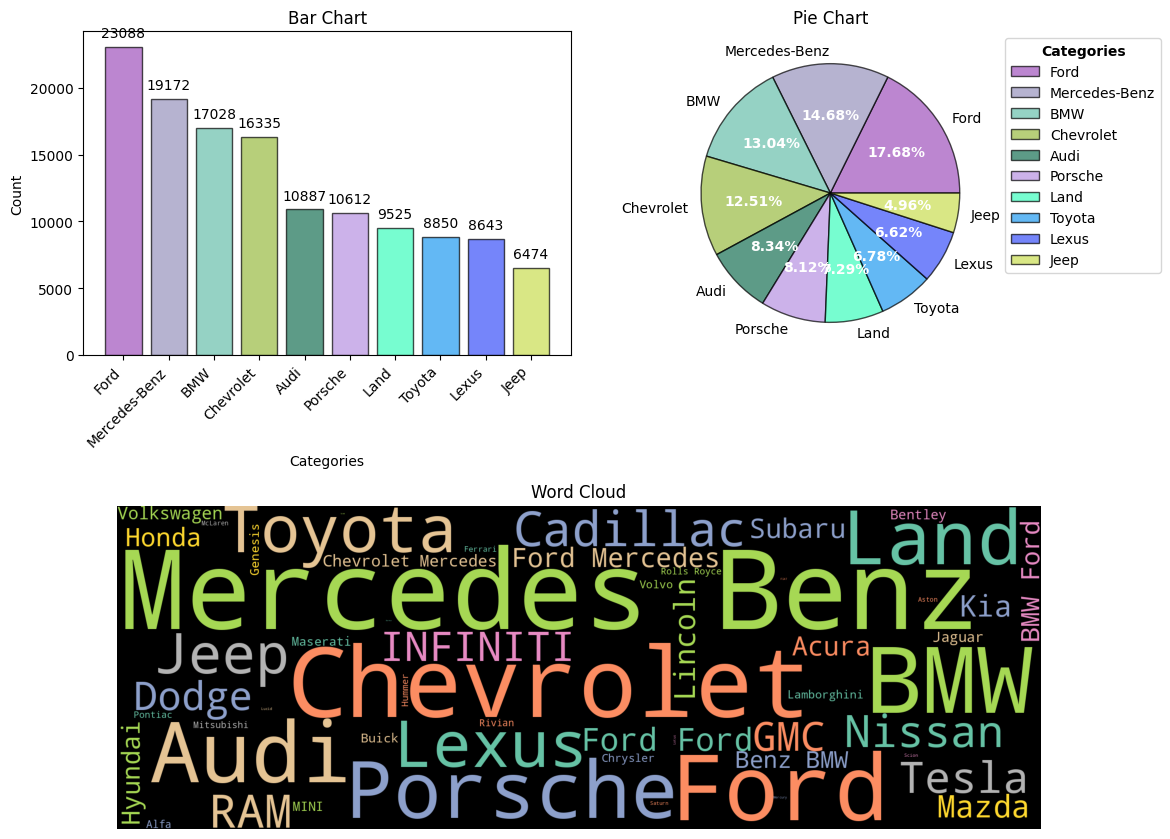

In [16]:
cat_univar_plots(train, "brand", top_n=10)

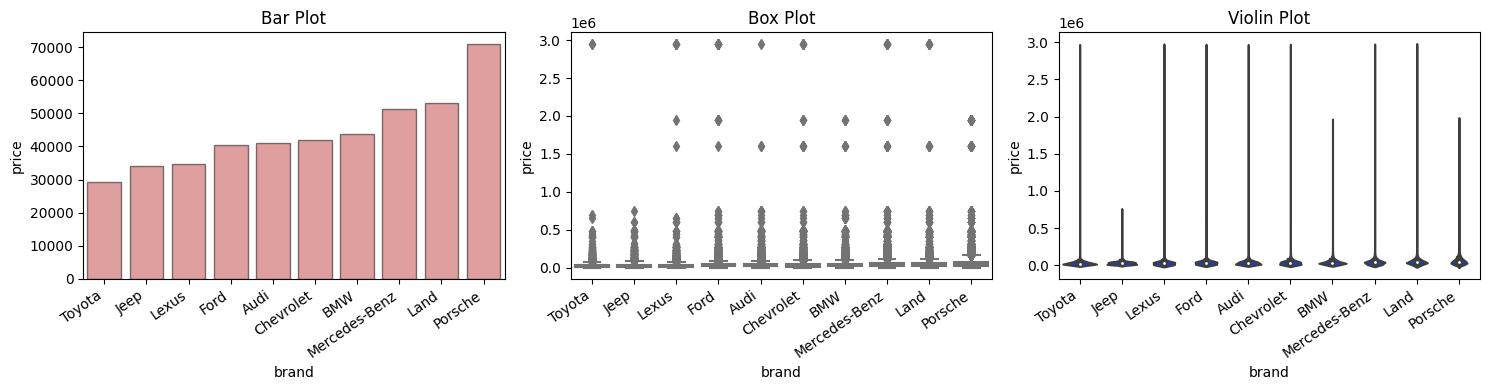

In [17]:
num_cat_bivar_plots(data=train, num_var="price", cat_var="brand", top_n=10)

In [18]:
train.model_year.value_counts().head(10)

model_year
2021    18198
2018    16414
2020    15848
2022    15749
2019    15409
2016    13696
2017    12794
2015    11389
2023     8769
2014     8415
Name: count, dtype: int64

* The year 1974 stands out awkwardly in the plot since the data primarily spans from 1992 to 2024, so we will exclude it from the visualization for clarity.

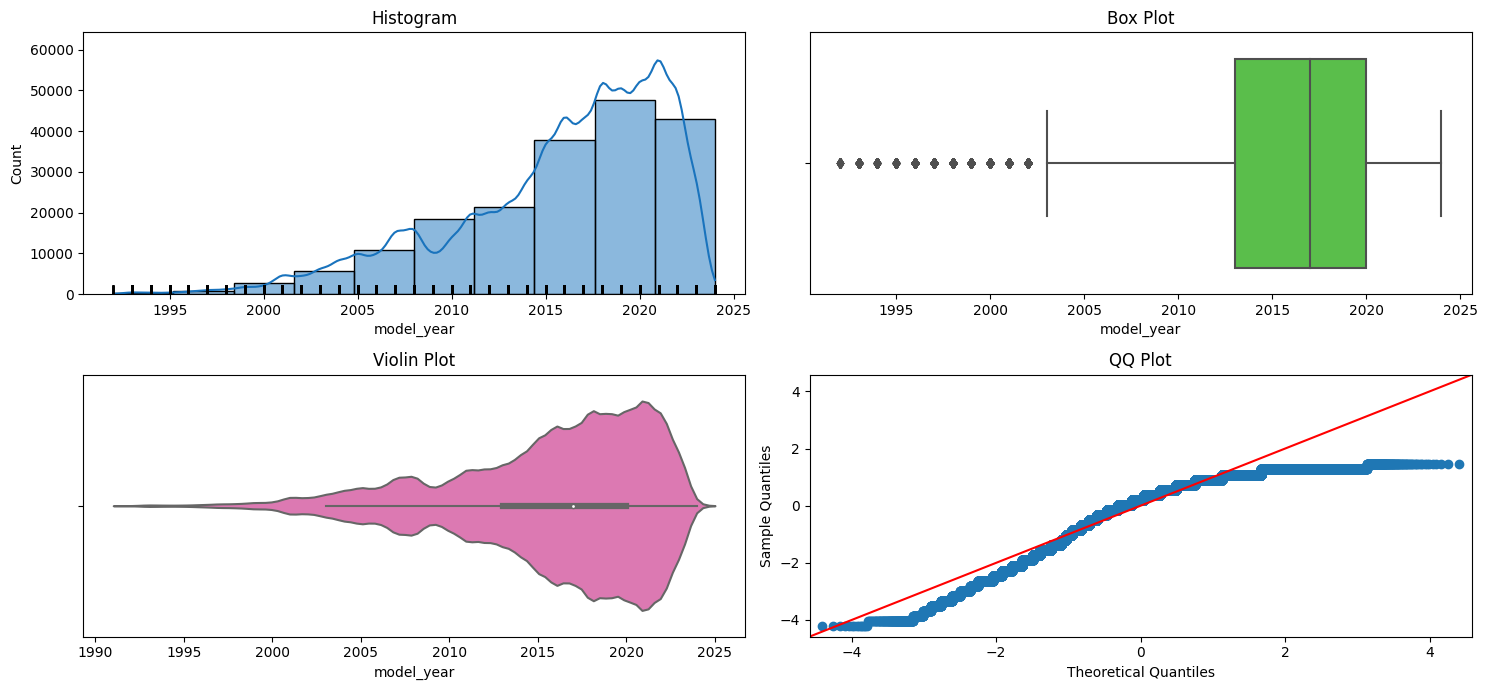

In [19]:
num_univar_plots(train[train['model_year'] != 1974], "model_year")

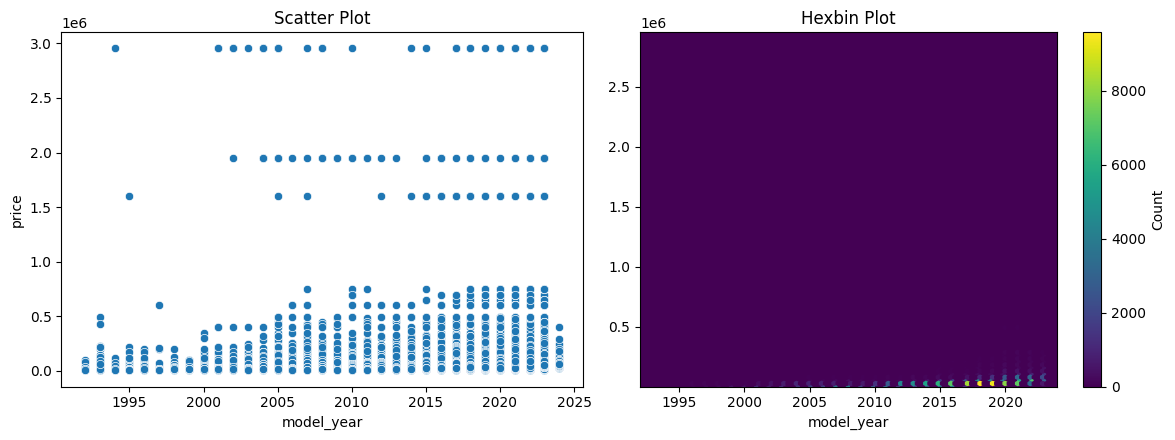

In [20]:
num_bivar_plots(train[train['model_year'] != 1974], "model_year", "price")

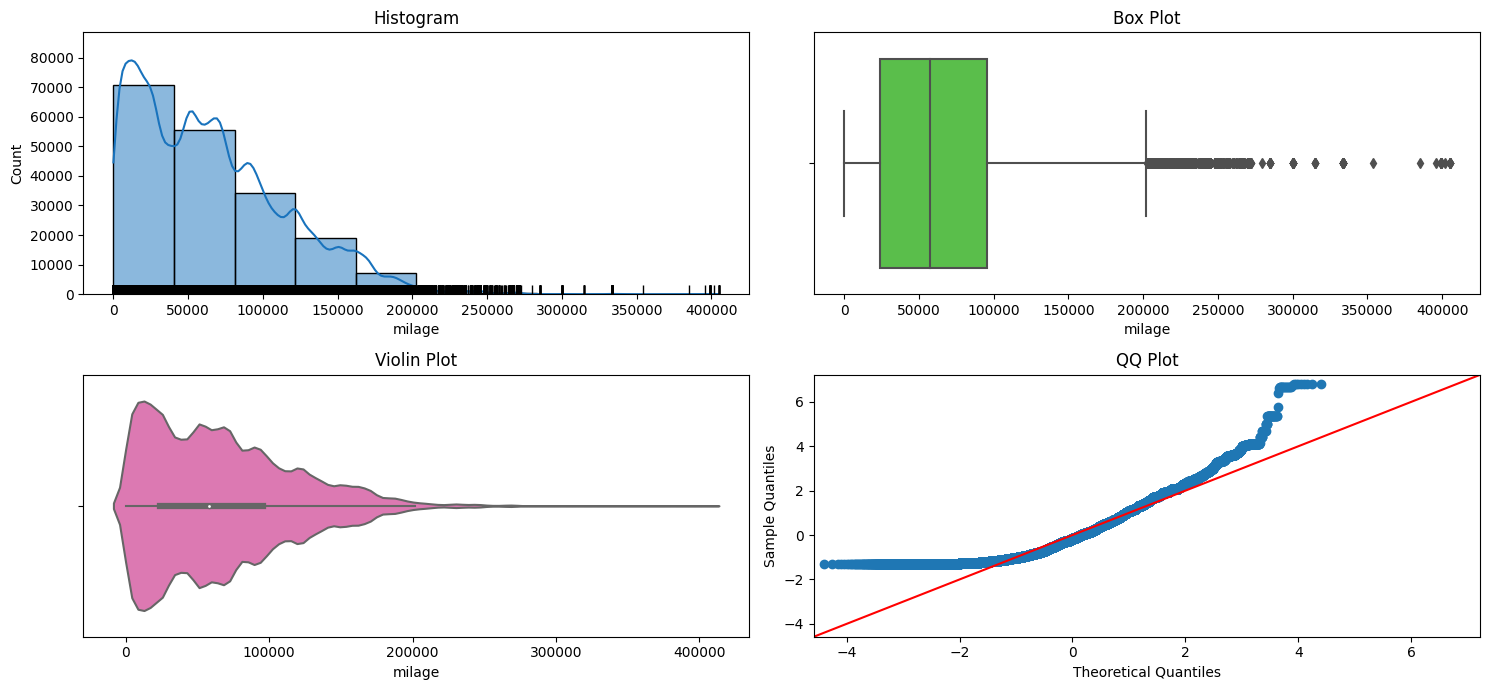

In [21]:
num_univar_plots(train, "milage")

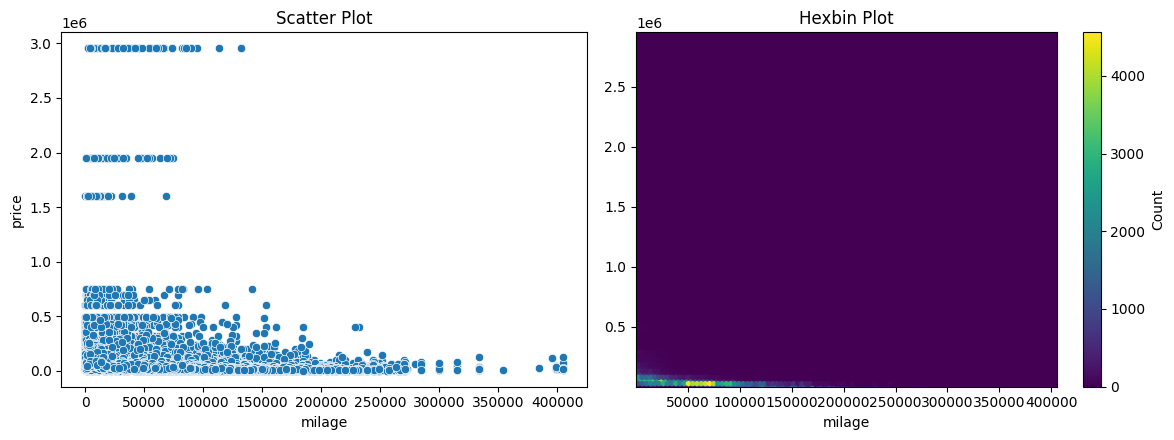

In [22]:
num_bivar_plots(train, "milage", "price")

In [23]:
(
    train.fuel_type
    .str.replace("Plug-In Hybrid", "Hybrid")
    .str.replace("–", "Other")
    .str.replace("not supported", "Other")
).value_counts()

fuel_type
Gasoline         165940
Hybrid             7353
E85 Flex Fuel      5406
Diesel             3955
Other               796
Name: count, dtype: int64

In [24]:
train_copy = train.copy()

train_copy['fuel_type'] = (
        train.fuel_type
        .str.replace("Plug-In Hybrid", "Hybrid")
        .str.replace("–", "Other")
        .str.replace("not supported", "Other")
)

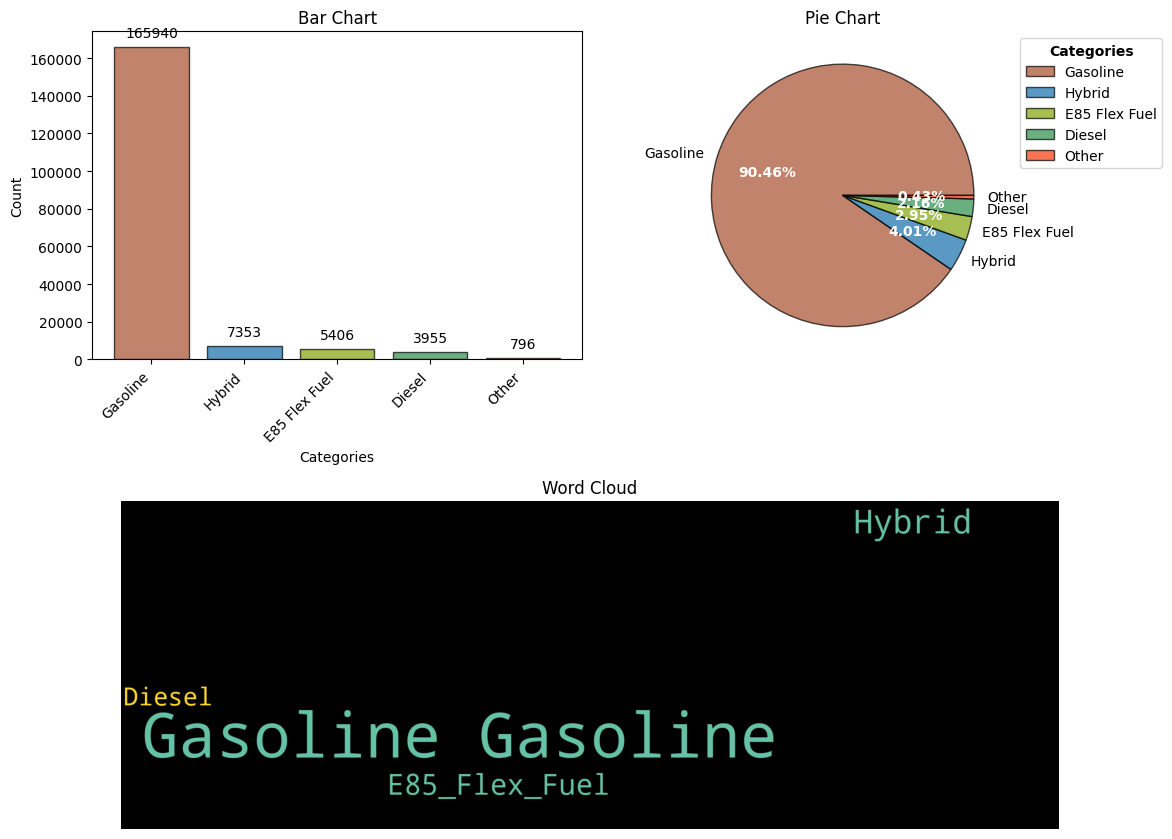

In [25]:
cat_univar_plots(train_copy, "fuel_type")

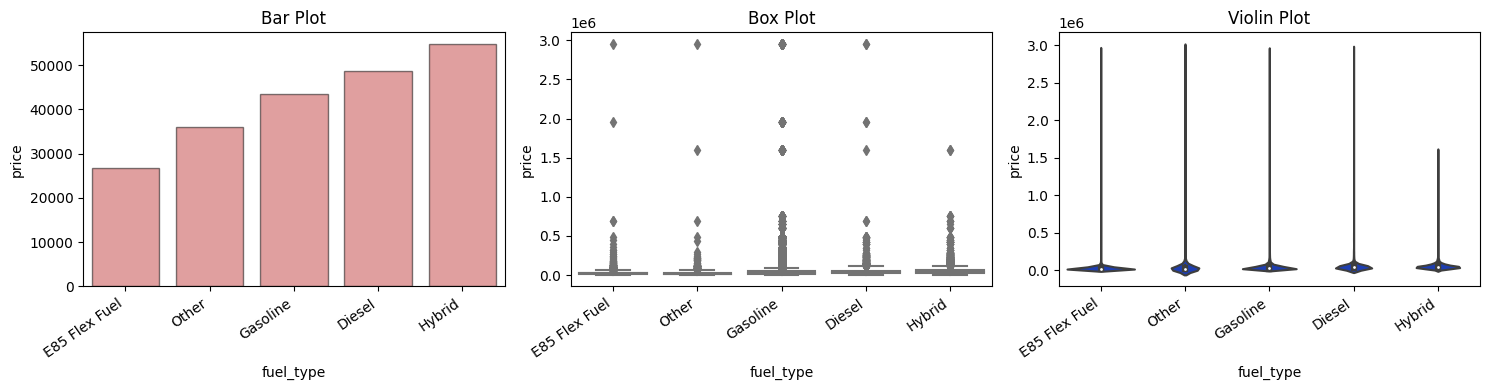

In [26]:
num_cat_bivar_plots(data=train_copy, num_var="price", cat_var="fuel_type")

In [27]:
train.accident.value_counts()

accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64

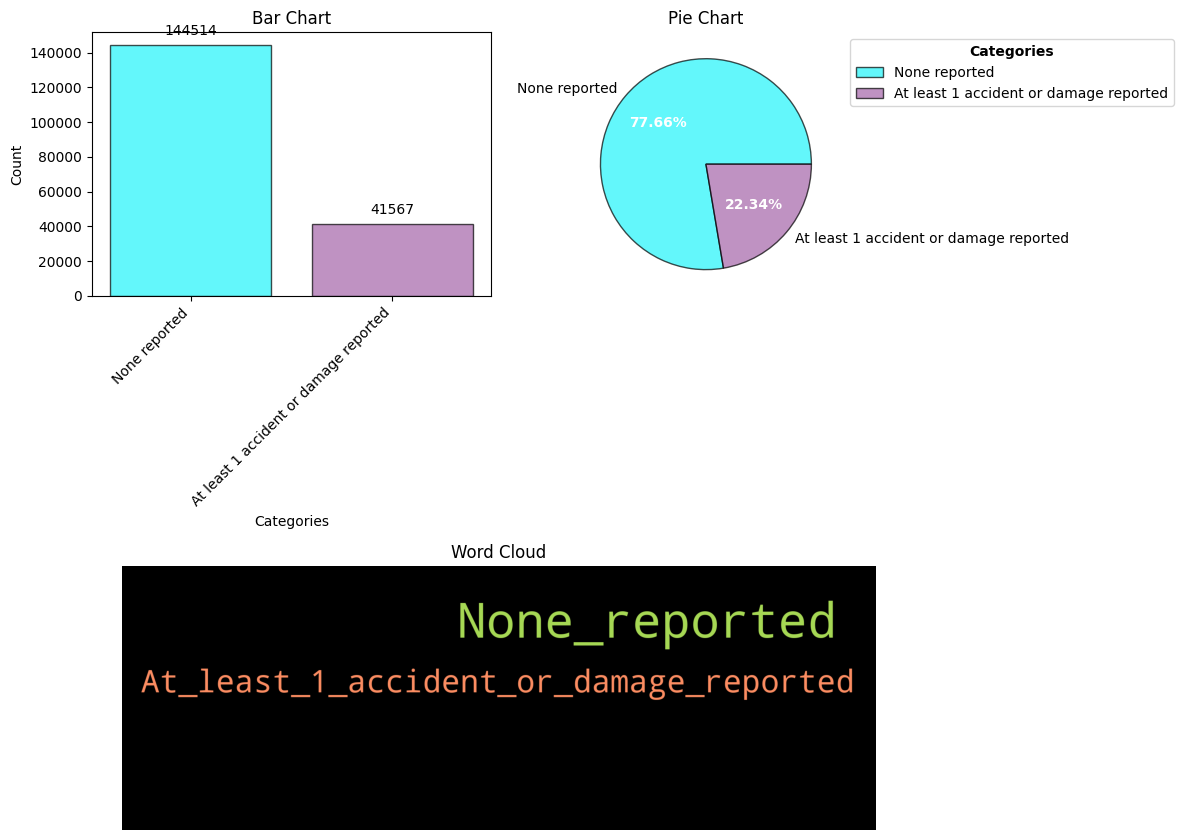

In [28]:
cat_univar_plots(train, "accident")

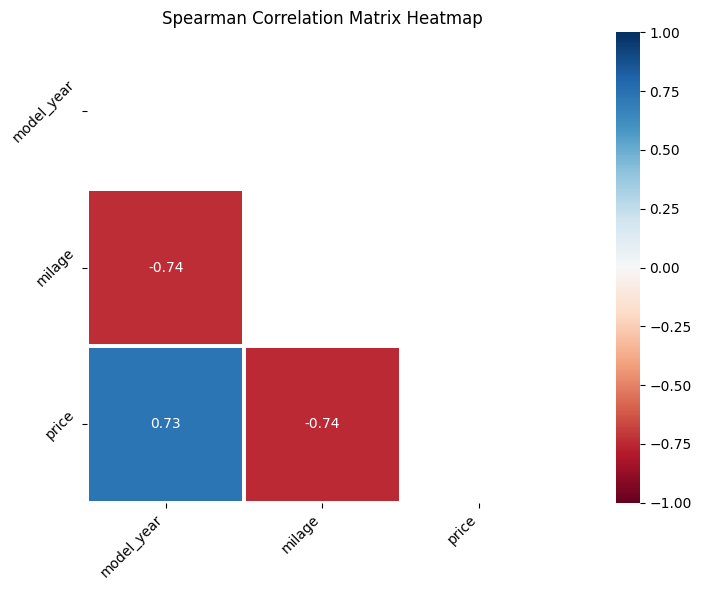

In [29]:
correlation_heatmap(train)

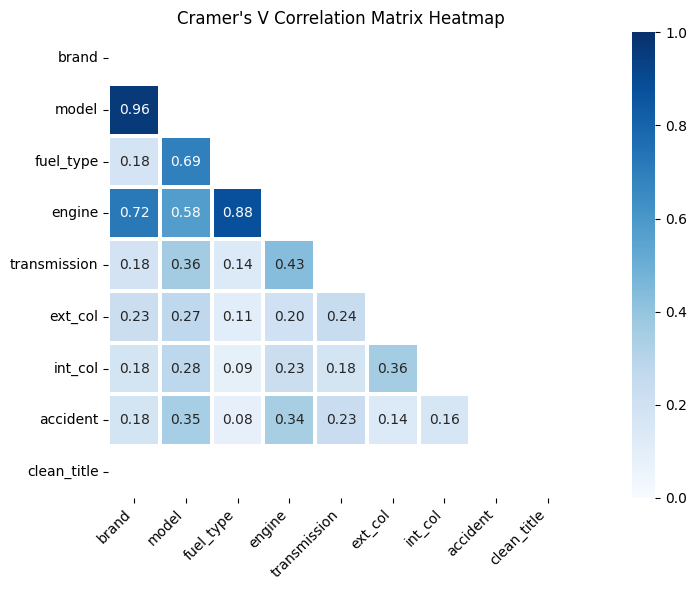

In [30]:
cramersV_heatmap(train)

In [31]:
train.transmission.value_counts().head(10)

transmission
A/T                               49904
8-Speed A/T                       20645
Transmission w/Dual Shift Mode    19255
6-Speed A/T                       18044
6-Speed M/T                       11998
7-Speed A/T                       11124
Automatic                         10691
8-Speed Automatic                  8431
10-Speed A/T                       8044
9-Speed A/T                        3866
Name: count, dtype: int64

In [32]:
transmission_mappings = {
    "Automatic": [
        'A/T', '7-Speed A/T', '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T',
        '6-Speed A/T', '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic', '9-Speed Automatic',
        '5-Speed A/T', 'Automatic', '7-Speed Automatic with Auto-Shift', '6-Speed Automatic',
        '4-Speed Automatic', '2-Speed A/T', '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
        '8-Speed Automatic with Auto-Shift', '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
        '6-Speed Automatic with Auto-Shift', '6-Speed Electronically Controlled Automatic with O',
        '8-SPEED A/T', '10-Speed Automatic with Overdrive', '7-Speed DCT Automatic', '5-Speed Automatic',
        '2-Speed Automatic', '7-Speed', '8-SPEED AT'
    ],
    "Manual": [
        'M/T', '5-Speed M/T', '6-Speed M/T', '7-Speed M/T', '6-Speed Manual', '7-Speed Manual',
        '8-Speed Manual', '6 Speed Mt', '6 Speed At/Mt'
    ],
    "CVT": [
        'CVT Transmission', 'Automatic CVT', 'CVT-F'
    ],
    "Other": [
        'Transmission w/Dual Shift Mode', 'Transmission Overdrive Switch', 'Single-Speed Fixed Gear',
        'Variable', 'SCHEDULED FOR OR IN PRODUCTION', '6-Speed', 'F', '2', '–'
    ]
}

modified_transmission = train_copy.transmission.copy()

for category, values in transmission_mappings.items():
    modified_transmission = modified_transmission.replace(values, category)

train_copy['modified_transmission'] = modified_transmission

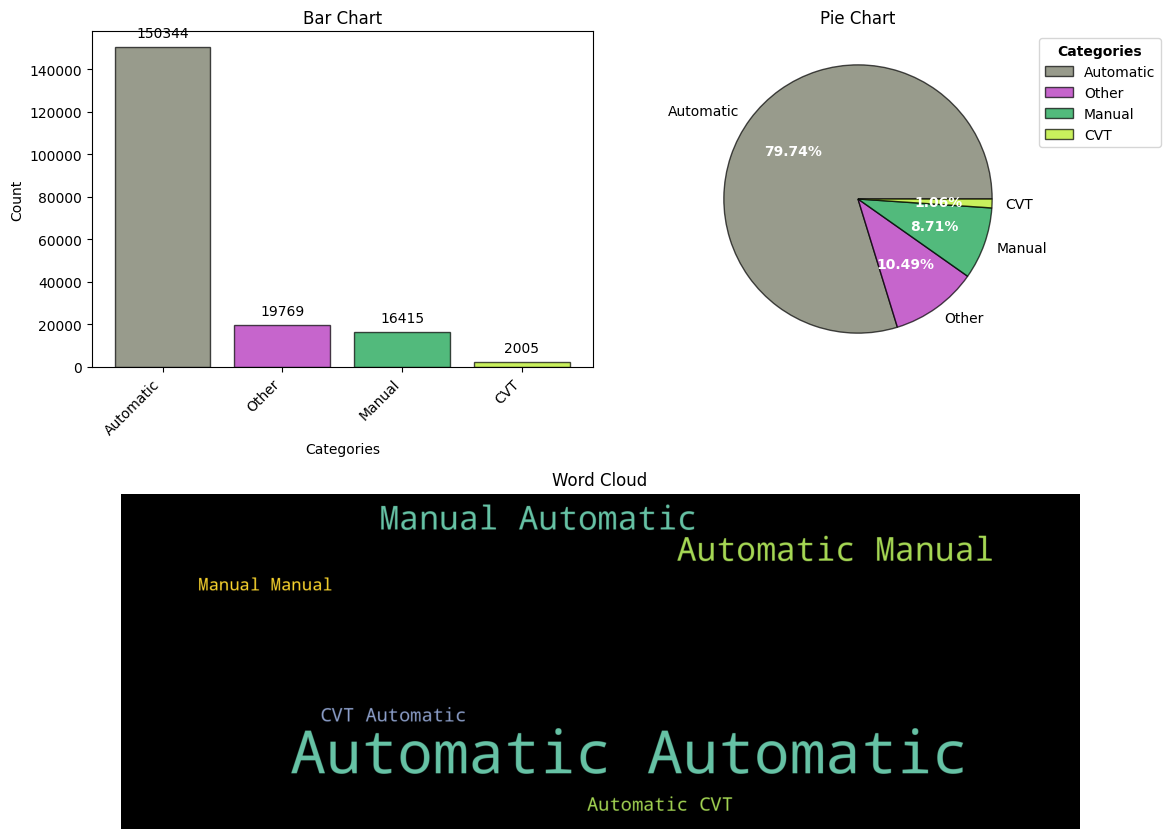

In [33]:
cat_univar_plots(train_copy, "modified_transmission")

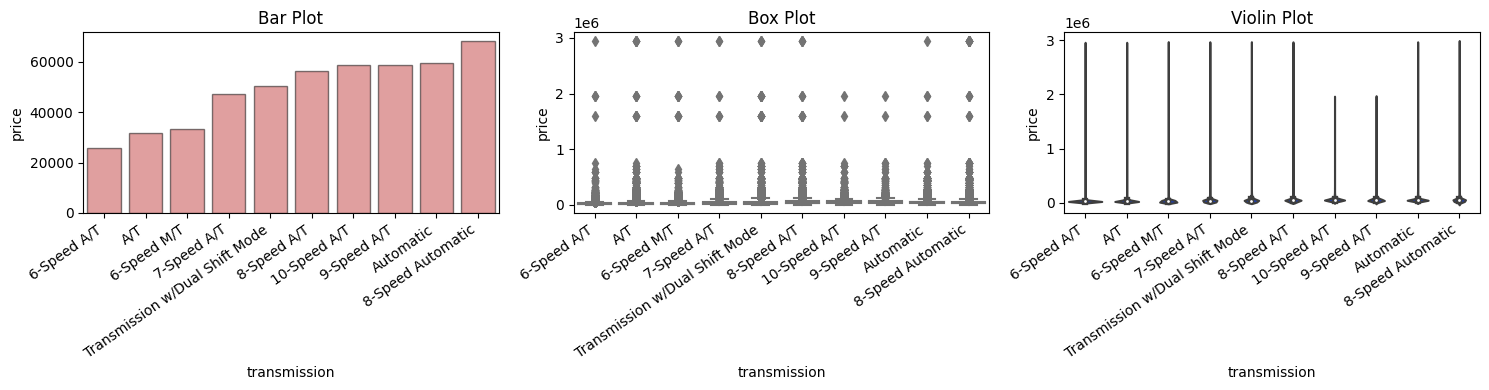

In [34]:
num_cat_bivar_plots(data=train, num_var="price", cat_var="transmission", top_n=10)

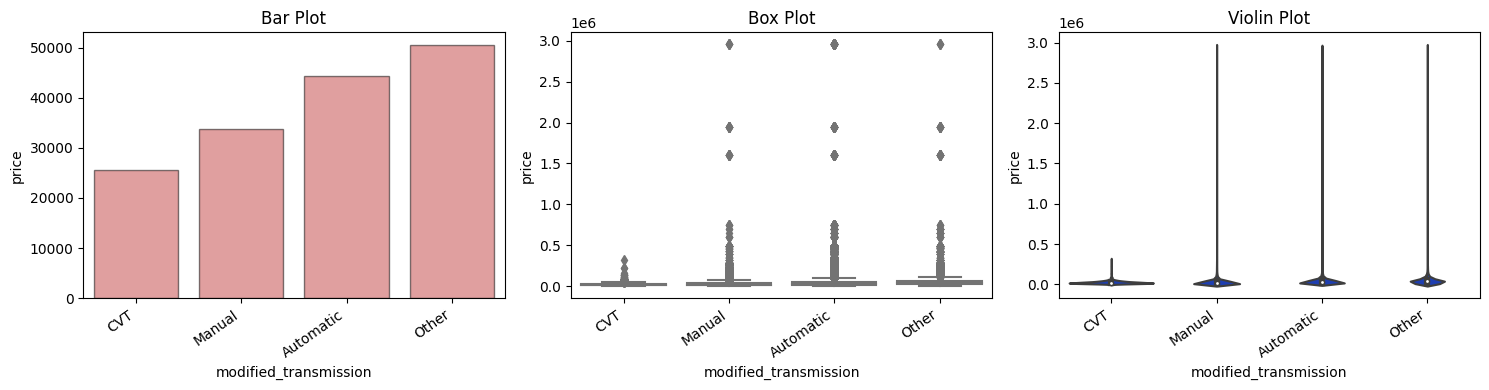

In [35]:
num_cat_bivar_plots(data=train_copy, num_var="price", cat_var="modified_transmission")

### **We’ll explore the data visualization, cleaning, and model building for the other columns later. Please upvote if you found this helpful!**